<a href="https://colab.research.google.com/github/BankNatchapol/ML-Algorithm/blob/master/Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Support Vector Machine**

---


Import Library ที่จำเป็นในการสร้าง Model

Library ในการ Prepare data

In [0]:
from sklearn.datasets import load_iris #Load Iris(flower) dataset 
from sklearn.model_selection import train_test_split #Use to separate data into Train and Test set
import pandas as pd # Create dataframe 

Library ในการทำการคำนวนและใช้งาน Model

In [0]:
from sklearn import svm # Create Model Support Vector Machine
from sklearn.metrics import confusion_matrix, f1_score # Performance Checking
import numpy as np # Basic calculation

Library ในการทำ Visualization

In [0]:
import matplotlib.pyplot as plt # Basic plot
from mlxtend.plotting import plot_decision_regions # Area plot

เริ่มจากลองใช้งานกับ data ง่ายๆดูก่อน

In [0]:
X = np.array([[0, 0], [1, 1]])
y = np.array([0, 1])
clf = svm.SVC(kernel='linear') # Train model by Linear Kernel
clf.fit(X, y);

In [0]:
ผลลัพท์ดูใช้ได้เลยครับ

In [269]:
clf.predict([[2., 2.]])

array([1])

ลอง plot Hyperplane ที่เป็นตัวแบ่งประเภทข้อมูลดู

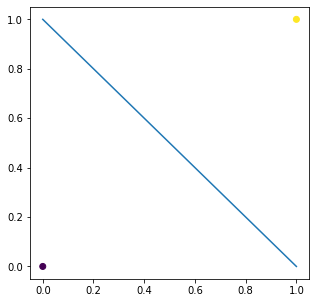

In [270]:
a = np.linspace(0,1)
Y = (-clf.coef_[0,0]*a - clf.intercept_)/clf.coef_[0,1]
plt.figure(figsize=(5,5));
plt.scatter(X[:,0],X[:,1],c=y);
plt.plot(a,Y);

มาลองกับ Data ที่ยากกว่านั้นดูบ้างครับ


โดยจะใช้ Iris dataset ซึ่งถือเป็น dataset พื้นฐานที่ใช้ในการเรียนรู้ Model ประเภท Classifier 

In [271]:
data = load_iris(return_X_y=False)
for i in data.keys():
  print(i)

data
target
target_names
DESCR
feature_names
filename


จากตารางจะเห็นว่า ข้อมูลของเราที่ได้มานั้นมีตัว Data เป็นขนาดของใบดอก มี 4 Features

In [272]:
df = pd.DataFrame(data = data.data,columns = data.feature_names )
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


ในส่วนของ Target จะเป็นประเภทของดอกไม้ที่เราจะแยกประเภท มีอยู่ 3 ประเภทด้วยกันคือ 'setosa', 'versicolor', 'virginica'
![alt text](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)

In [273]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

ในส่ว่นของ Target ของแต่ละ Row ข้อมูล จะเป็นตามข้อมมูลด้านล่าง ซึ่ง 0 คือ 'setosa', 1 คือ 'versicolor', 2 คือ 'virginica'

In [285]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

ในที่นี้จะมีการโกงนิดหน่อย เนื่องจากข้อมูลนั้นมี 4 features ทำให้ไม่สามารถพลอตเป็น 2D ด้วยข้อมูลทั้งหมดในกราฟเดียวได้ <br>
จริงๆควร plot ด้วย scatter_matrix แต่เนื่องจากเพื่อความเข้าใจง่าย จะยุบ Feature ให้เหลือ 2 Feature คือ Sepal Area และ Petal Area

In [0]:
X = np.zeros([data.data.shape[0],data.data.shape[1]//2])
X[:,0] = data.data[:,0]* data.data[:,1]
X[:,1] = data.data[:,2]* data.data[:,3]
y = data.target

ลอง plot ข้อมูลที่ได้มาดู

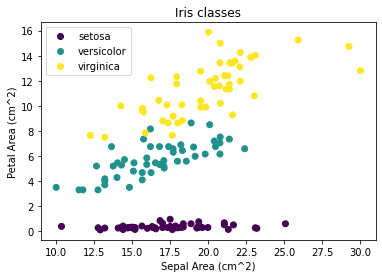

In [306]:
scatter = plt.scatter(X[:,0],X[:,1],c=y,label=data.feature_names)
plt.title('Iris classes')
plt.legend(handles=scatter.legend_elements()[0], labels=list(data.target_names))
plt.xlabel('Sepal Area (cm^2)')
plt.ylabel('Petal Area (cm^2)');


ทำการ Train Test Split เพื่อแยกชุด Training set กับ Test set จะเห็นว่ามีการแบ่งเป็น Training set 75% และ Test set 25%

In [277]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
print(f'X_train : {X_train.shape}\ny_train : {y_train.shape}\nX_test : {X_test.shape}\ny_test : {y_test.shape}')

X_train : (112, 2)
y_train : (112,)
X_test : (38, 2)
y_test : (38,)


ทำการสร้าง Model Support Vector Machine โดยใช้ Linear Kernel<br>
และ Train Model ด้วย Training set

In [278]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

ลองดูค่า Accuracy

In [279]:
clf.score(X_test,y_test)

0.9736842105263158

Confusion Matrix

In [280]:
y_pred = clf.predict(X_test)
c = confusion_matrix(y_test,y_pred)
c

array([[ 8,  0,  0],
       [ 0, 16,  1],
       [ 0,  0, 13]])

F1 Score ของแต่ละ Class

In [281]:
f1 = f1_score(y_test,y_pred,average=None)
f1

array([1.        , 0.96969697, 0.96296296])

 plot เพื่อดู เส้น Hyperplane ที่เป็นตัวแบ่งแต่ละกลุ่ม

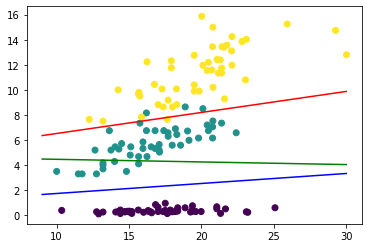

In [283]:
a = np.linspace(9,30)
plt.scatter(A,B,c=data.target)
plt.plot(a,(-clf.coef_[2,0]*a - clf.intercept_[2])/clf.coef_[2,1],'r')
plt.plot(a,(-clf.coef_[1,0]*a - clf.intercept_[1])/clf.coef_[1,1],'g')
plt.plot(a,(-clf.coef_[0,0]*a - clf.intercept_[0])/clf.coef_[0,1],'b');

ลองดูเป็น Region จะเห็นภาพการแบ่งกลุ่มของ SVM ได้ชัดเจนยิ่งขึ้น

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


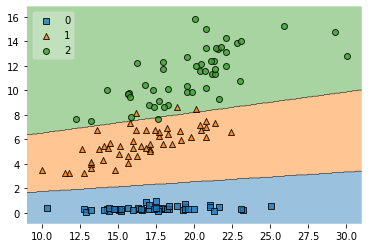

In [311]:
plot_decision_regions(X, y, clf=clf, legend=2);